<a href="https://colab.research.google.com/github/dar10p/atmos-optics/blob/Cambranch/Tarea_1_Propagador_Camilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tarea 1, Propagador óptico
Camilo Weinberger.

Se importan las librerías correspondientes:


*   numpy para cálculos
*   matplotlib para herramientas de gráficos



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import misc

Se definen los valores iniciales:
* tamaño imagen
* tamaño pixel
* tamaño pupila
* grosor lente
* longitud de onda
* distancia focal

In [2]:
size= 1000
R = size/2 #pix
Lm = 3*10**-3
px_s = Lm/size
lamb = 500*10**-9 # red
k=2*np.pi/lamb
f = 0.5    #foco en m
d_0 = 1*10**-3    # lente de 1mm de grosor.

Se programa la máscara para el propagador $\mathbb{I}_\Sigma (\boldsymbol{\rho^\prime})$ (pupil)


In [3]:
def pupil(size,px_s,R):
  X = np.linspace(-(size/2)*px_s,(size/2)*px_s,size)
  Y = X
  xx, yy = np.meshgrid(X,Y,sparse=True)
  r = np.sqrt(xx**2+yy**2)
  mask = np.ones((size,size))
  mask = mask*(r<=px_s*R)
  return mask,r

mask,r=pupil(size,px_s,R)

Definimos la función tramitancia para un lente curvo a partir de la ecuación $t(x)=\mathbb{I}_\Sigma(\boldsymbol{\rho})e^{ik\Delta_0}\exp\left[-i\frac{k}{2f}\boldsymbol{\rho}^2\right]$

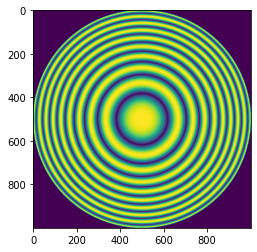

In [4]:
T_t=mask*np.exp(1j*k*(d_0-r**2/(2*f)))
plt.imshow(abs(np.real(T_t)))

Definimos la función correspondiente a la aproximación de Fresnell $ u(\boldsymbol{\rho}, L)=\frac{e^{i k\left(L+\frac{1}{2 L} \rho^{2}\right)}}{i \lambda L} \int_{\mathbb{R}^{2}} u\left(\boldsymbol{\rho}^{\prime}, 0\right) \exp \left(i \frac{k}{L} \boldsymbol{\rho} \cdot \boldsymbol{\rho}^{\prime}\right) d^{2} \rho^{\prime} $

*Alternativamente, podremos escribir esta convoluci ́on como el producto de la transformada del campo inicial por la transformada de la función impulso-respuesta* [Apunte_Fourier_Optics.pdf] 

> $H(\boldsymbol{\omega})=e^{i k d_{0}} \exp \left(-\frac{i L}{2 k} \omega^{2}\right)$



In [5]:
def focus(Uin,f):
  size_Uin = Uin.shape
  P = pupil(size_Uin[0],px_s,R)[0]
  T_t = P*np.exp(-1j*k*(r**2)/(2*f))
  Uout = Uin*T_t
  return Uout
  
def Prop(Uin,z):
  H = np.exp(-1j*np.pi*np.pi*z*r**2/lamb*10**3)
  H = np.fft.fftshift(H)
  U1 = np.fft.fft2(np.fft.fftshift(Uin))
  u2 = np.fft.ifftshift(np.fft.ifft2(U1*H))
  return u2

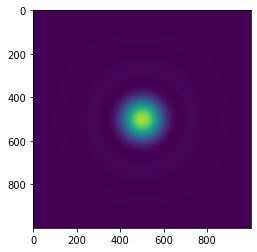

In [6]:
Pre_im=focus(pupil(1000,px_s,10)[0],f=0.05)
Image = Prop(Pre_im,z=0.05)
plt.imshow(np.abs(Image**2),)
plt.imshow?

In [7]:
from skimage import data
from skimage.color import rgb2gray

im1 = plt.imread('1234.jpg')
im1 = rgb2gray(im1)

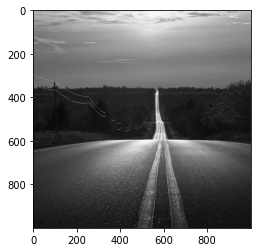

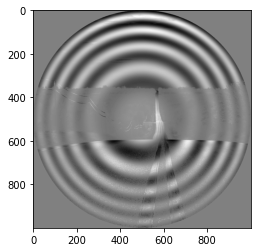

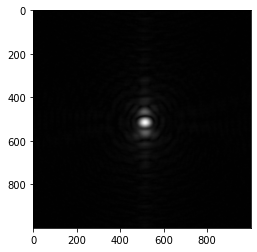

In [8]:
plt.imshow(abs(im1),'gray')
plt.show()
Image = focus(im1,f=0.5)
plt.imshow(np.real(Image),'gray')
plt.show()
Image2 = Prop(Image,z=0.5)
plt.imshow(np.abs(Image2),'gray')

## Observación

Este sistema funciona bien para ciertos parámetros en la simulación, esto ocurre cuando la imágen es mayor en tamaño respecto a la pupila, para caso contrario la simulación considerará el borde  de la imágen como un obstaculo y en la propagación aparecerán deformaciones asociados a dichos bordes.

---


## Solución


En el capítulo 7 se menciona este problema y se resuelve añadindo en consepto del número de foco, que relaciona el diámetro de la pupila respecto a la distancia focal del lente de la forma
$ F/\text{#} =\frac{d}{f} $
